## Part-1 : Panorama stitching

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imutils
cv2.ocl.setUseOpenCL(False)
%matplotlib inline

In [3]:
# select the image id (valid values 1,2,3, or 4)
feature_extractor = 'orb' # one of 'sift', 'surf', 'brisk', 'orb'
feature_matching = 'bf'

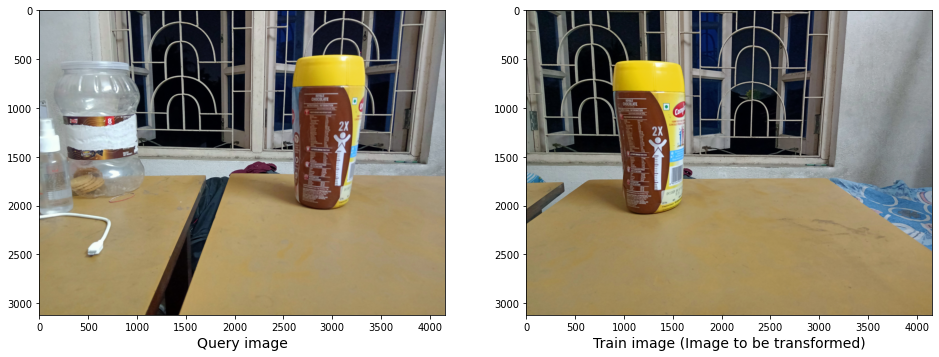

In [41]:
trainImg = imageio.imread("im2.jpg")
trainImg_gray = cv2.cvtColor(trainImg, cv2.COLOR_RGB2GRAY)

queryImg = imageio.imread("im1.jpg")
queryImg_gray = cv2.cvtColor(queryImg, cv2.COLOR_RGB2GRAY)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(queryImg, cmap="gray")
ax1.set_xlabel("Query image", fontsize=14)

ax2.imshow(trainImg, cmap="gray")
ax2.set_xlabel("Train image (Image to be transformed)", fontsize=14)

plt.show()

In [42]:
descriptor = cv2.ORB_create()
kpsA, featuresA = descriptor.detectAndCompute(trainImg_gray, None)
kpsB, featuresB = descriptor.detectAndCompute(queryImg_gray, None)

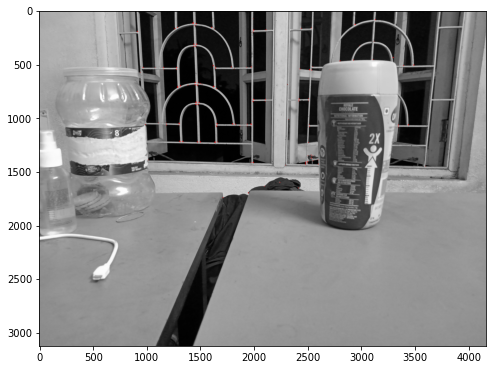

In [43]:
plt.figure(figsize=(8,8))
plt.imshow(cv2.drawKeypoints(queryImg_gray,kpsB,None,color=(255,0,0)))

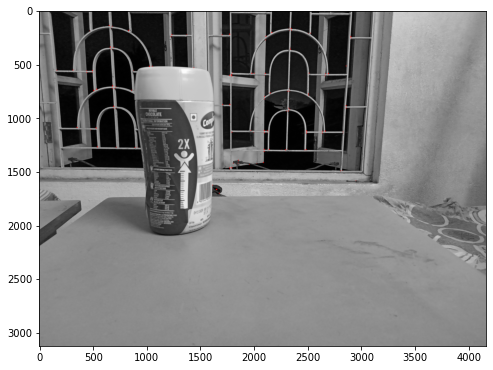

In [44]:
plt.figure(figsize=(8,8))
plt.imshow(cv2.drawKeypoints(trainImg_gray,kpsA,None,color=(255,0,0)))

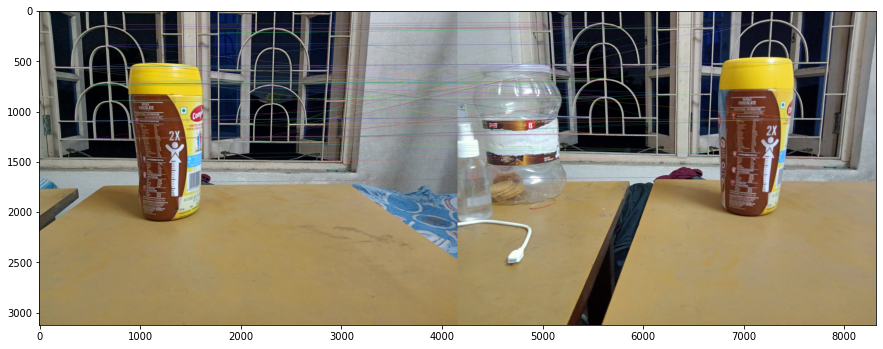

In [45]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
best_matches = bf.match(featuresA,featuresB)
rawMatches = sorted(best_matches, key = lambda x:x.distance)
img3 = cv2.drawMatches(trainImg,kpsA,queryImg,kpsB,rawMatches[:100],
                           None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15,15))
plt.imshow(img3)

In [46]:
def getHomography(kpsA, kpsB, featuresA, featuresB, matches, reprojThresh):
    # convert the keypoints to numpy arrays
    kpsA = np.float32([kp.pt for kp in kpsA])
    kpsB = np.float32([kp.pt for kp in kpsB])
    
    if len(matches) > 4:

        # construct the two sets of points
        ptsA = np.float32([kpsA[m.queryIdx] for m in matches])
        ptsB = np.float32([kpsB[m.trainIdx] for m in matches])
        
        # estimate the homography between the sets of points
        (H, status) = cv2.findHomography(ptsA, ptsB, cv2.RANSAC,
            reprojThresh)

        return (matches, H, status)
    else:
        return None

In [47]:
M = getHomography(kpsA, kpsB, featuresA, featuresB, rawMatches, reprojThresh=4)
(matches, H, status) = M
print(H)

[[ 8.93231796e-01  6.42954129e-03  8.29176452e+02]
 [-3.61263640e-02  9.83780581e-01 -1.02986338e+00]
 [-2.89717504e-05  1.88790971e-05  1.00000000e+00]]


(-0.5, 8319.5, 6239.5, -0.5)

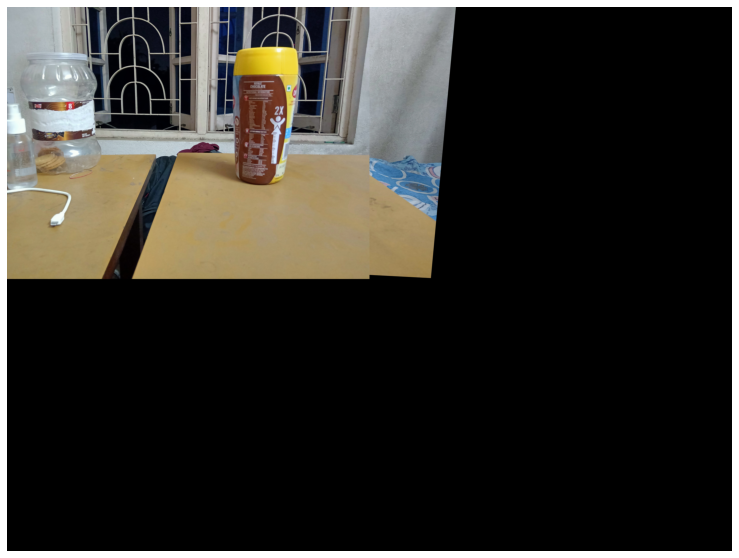

In [48]:
# Apply panorama correction
width = trainImg.shape[1] + queryImg.shape[1]
height = trainImg.shape[0] + queryImg.shape[0]

result = cv2.warpPerspective(trainImg, H, (width, height))
result[0:queryImg.shape[0], 0:queryImg.shape[1]] = queryImg

plt.figure(figsize=(20,10))
plt.imshow(result)
plt.axis('off')


In [49]:
cv2.imwrite('Panoroma_result2.jpg',result[:,:,::-1])

True

## Desparity Map  ##

In [40]:
Ln=cv2.imread("ds_im1.jpg")
Rn=cv2.imread("ds_im2.jpg")


Lb=cv2.cvtColor(Ln,cv2.COLOR_BGR2GRAY)
Rb=cv2.cvtColor(Rn,cv2.COLOR_BGR2GRAY)

lbb=cv2.GaussianBlur(Lb,(27,27),21)
rbb=cv2.GaussianBlur(Rb,(27,27),21)


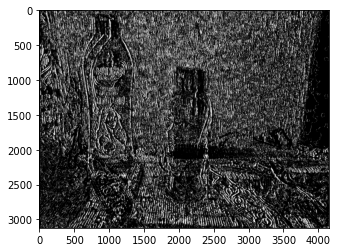

In [38]:
stereo=cv2.StereoBM_create(numDisparities=16,blockSize=5)
disparity=stereo.compute(rbb,lbb)
plt.imshow(disparity,'gray')
plt.show()

In [39]:
cv2.imwrite('desp_result2.jpg',disparity)

True